In [ ]:
# Seasonality -> Repeating trends
# Cyclical -> Trends with no set of repetitions

#Hodrick-prescott filter -> this filter used to seprate out trend component and cyclic component

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df.head()

# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

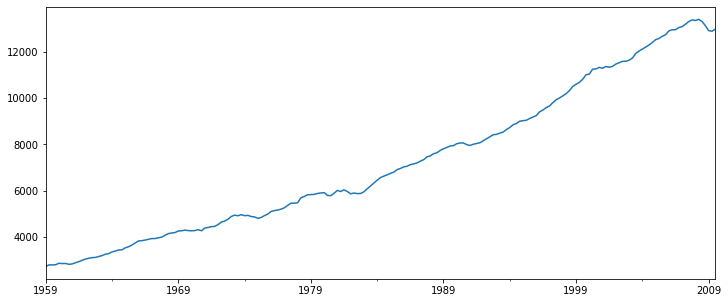

In [7]:
df['realgdp'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

<class 'pandas.core.series.Series'>


<AxesSubplot:>

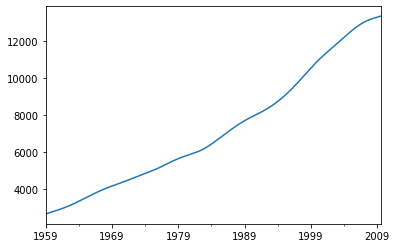

In [11]:
print(type(gdp_trend))
gdp_trend.plot()

<class 'pandas.core.series.Series'>


<AxesSubplot:>

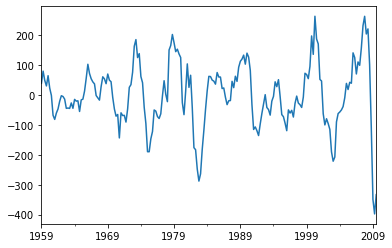

In [12]:
print(type(gdp_cycle))
gdp_cycle.plot()

In [13]:
df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<AxesSubplot:>

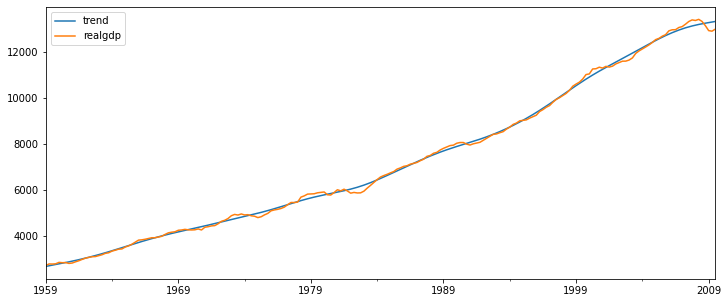

In [14]:
df[['trend','realgdp']].plot(figsize=(12,5))

<AxesSubplot:>

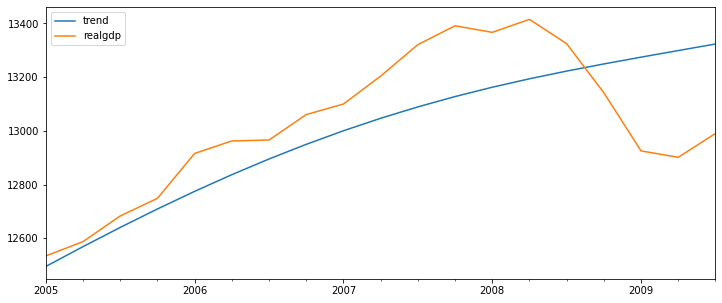

In [15]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))